In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sbrn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# from mixed_naive_bayes import MixedNB
from sklearn.naive_bayes import CategoricalNB



In [5]:
df = pd.read_csv("../Data/Cleandata.csv")
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
df

,Year,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
0,2016,2,39.063148,-84.032608,0.010,State Route 32,Williamsburg,Clermont,OH,KI69,36.0,33.3,10.0,SW,Overcast,True,Night,30.0
1,2016,3,39.747753,-84.205582,0.010,I-75 S,Dayton,Montgomery,OH,KDAY,35.1,31.0,9.0,SW,Mostly Cloudy,False,Night,30.0
2,2016,2,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,Dayton,Montgomery,OH,KMGY,36.0,33.3,6.0,SW,Mostly Cloudy,True,Day,30.0
3,2016,3,40.100590,-82.925194,0.010,Westerville Rd,Westerville,Franklin,OH,KCMH,37.9,35.5,7.0,SSW,Light Rain,False,Day,30.0
4,2016,2,39.758274,-84.230507,0.000,N Woodward Ave,Dayton,Montgomery,OH,KDAY,34.0,31.0,7.0,WSW,Overcast,False,Day,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314280,2017,2,28.879630,-82.092960,0.722,I-75 S,Wildwood,Sumter,FL,KVVG,80.0,80.0,10.0,VAR,Light Rain with Thunder,False,Day,360.0
314281,2017,2,37.993881,-92.795869,0.000,Sunny Slope Dr,Camdenton,Camden,MO,KH21,75.0,75.0,10.0,N,Cloudy,False,Day,360.0
314282,2017,2,46.617235,-113.051251,0.000,US-12 W,Drummond,Granite,MT,K3DU,89.0,89.0,3.0,SSE,Haze,False,Day,360.0
314283,2017,4,46.672100,-113.153690,9.486,US-12 W,Drummond,Granite,MT,K3DU,57.0,57.0,4.0,CALM,Haze,False,Night,360.0


In [6]:
print('Column names in the dataset are: \n{}'.format(('\n').join(df.columns)))

Column names in the dataset are: 
Year
Severity
Start_Lat
Start_Lng
Distance(mi)
Street
City
County
State
Airport_Code
Temperature(F)
Wind_Chill(F)
Visibility(mi)
Wind_Direction
Weather_Condition
Traffic_Signal
Sunrise_Sunset
TimeDiff


In [7]:
X = df.drop(columns='Severity')
y = df['Severity']
df['TimeDiff'] = df['TimeDiff']/60

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314285 entries, 0 to 314284
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               314285 non-null  int64  
 1   Severity           314285 non-null  int64  
 2   Start_Lat          314285 non-null  float64
 3   Start_Lng          314285 non-null  float64
 4   Distance(mi)       314285 non-null  float64
 5   Street             314285 non-null  object 
 6   City               314285 non-null  object 
 7   County             314285 non-null  object 
 8   State              314285 non-null  object 
 9   Airport_Code       314285 non-null  object 
 10  Temperature(F)     314285 non-null  float64
 11  Wind_Chill(F)      314285 non-null  float64
 12  Visibility(mi)     314285 non-null  float64
 13  Wind_Direction     314285 non-null  object 
 14  Weather_Condition  314285 non-null  object 
 15  Traffic_Signal     314285 non-null  bool   
 16  Su

In [9]:
numerical_features = []
categorical_features = []
for column in X.columns:
    if (df[column].dtype == 'float64' or df[column].dtype == 'int64'):
        numerical_features.append(column)
    elif (df[column].dtype == 'object' or df[column].dtype == 'bool'):
        categorical_features.append(column)

In [10]:
print('There are a total of {} numerical features in the dataset.'.format(len(numerical_features)))
numerical_features


There are a total of 8 numerical features in the dataset.


['Year',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Visibility(mi)',
 'TimeDiff']

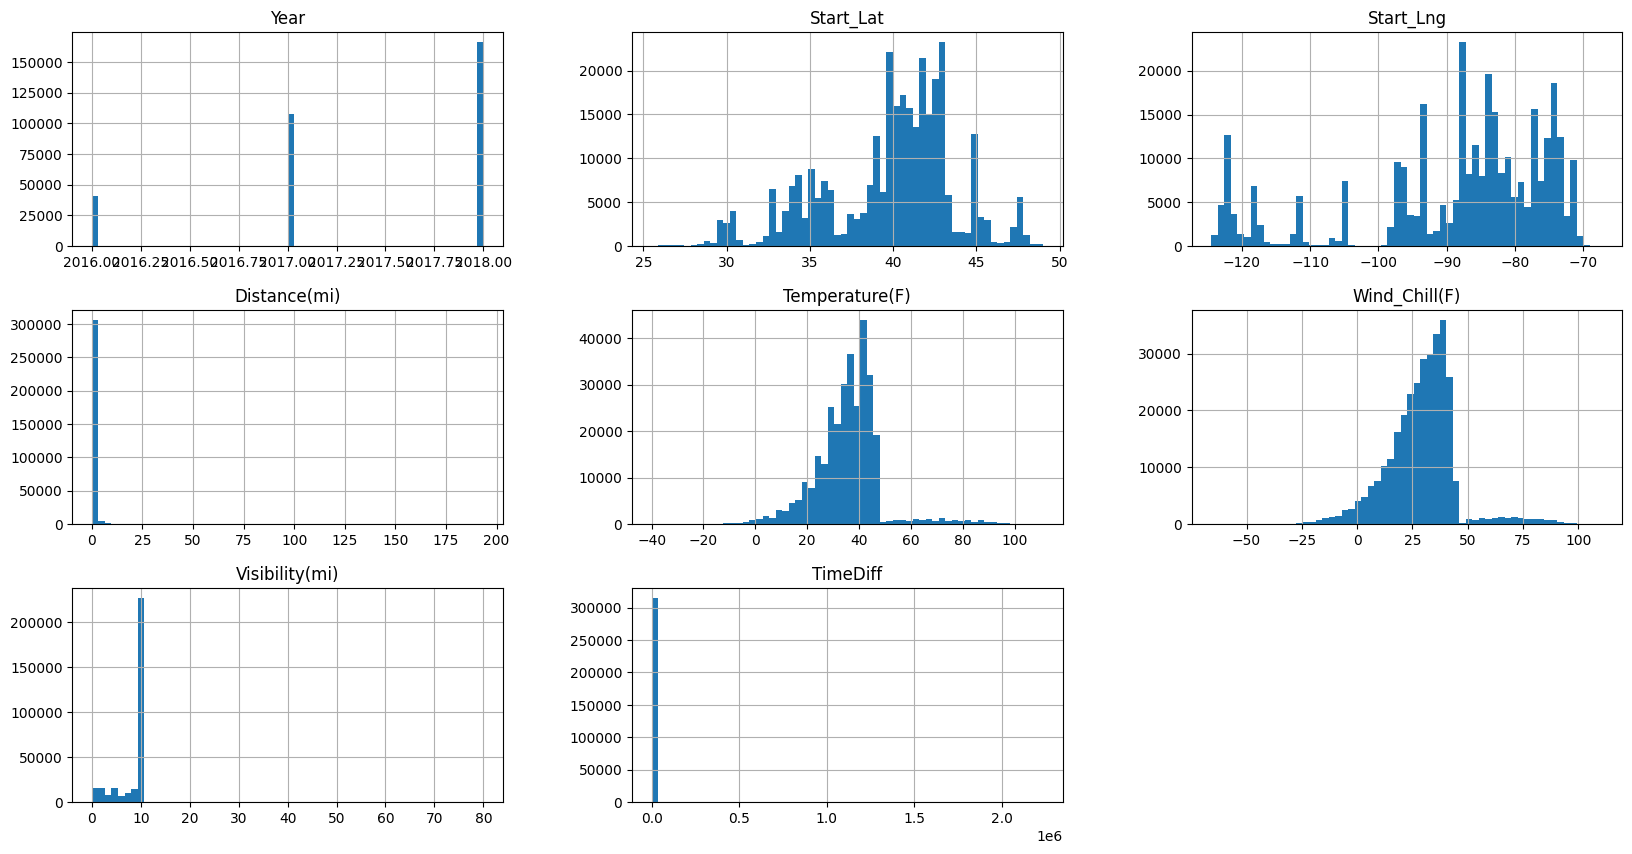

In [11]:
X_num_total = X[numerical_features]
X_num_total.hist(bins=60,figsize=(20, 10))
plt.show()

In [12]:
print('Uniques values of Accident Index column are: {}'.format(X_num_total['TimeDiff'].nunique()))

Uniques values of Accident Index column are: 5268


In [13]:
X_cat_total = X[categorical_features]
print('Unique values for each categorical column are:\n {}'.format(X_cat_total.nunique()))

Unique values for each categorical column are:
 Street               47865
City                  7762
County                1397
State                   49
Airport_Code          1721
Wind_Direction          23
Weather_Condition       85
Traffic_Signal           2
Sunrise_Sunset           2
dtype: int64


In [14]:
X = X.drop(columns=['City','Street','County','Airport_Code'])

In [15]:
numerical_features.remove('Year')
categorical_features.append('Year')
categorical_features.remove('City')
categorical_features.remove('Street')
categorical_features.remove('County')
categorical_features.remove('Airport_Code')

In [16]:
# categorical feature list
categorical_features_index = list()
# Encode categorical features, get the indexes of categorical 
for i in categorical_features:
    categorical_features_index.append(X.columns.get_loc(i))
    X[i] = LabelEncoder().fit_transform(X[i])

In [42]:
# numerical feature list
numerical_features_index = list()
# Encode num features, get the indexes of categorical 
for i in numerical_features:
    numerical_features_index.append(X.columns.get_loc(i))
    # X[i] = LabelEncoder().fit_transform(X[i])

In [17]:
y = LabelEncoder().fit_transform(y)

In [18]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.2, random_state = 18)


In [20]:
mixed_nb_alpha = [1.0,2.0,3.0,4.0,5.0]



In [21]:
categorical_features_index

[4, 8, 9, 10, 11, 0]

In [22]:
X_train

,Year,Start_Lat,Start_Lng,Distance(mi),State,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
164828,2,45.130253,-93.390793,0.000,21,43.0,38.2,10.0,6,3,0,0,44.416667
125645,2,40.756248,-111.912476,0.000,42,30.0,20.0,0.5,10,70,0,0,29.650000
252511,0,47.642930,-117.606439,0.237,45,31.1,23.1,1.8,13,45,0,0,360.000000
131680,2,41.354214,-75.374352,13.640,36,27.0,17.3,3.0,8,45,0,1,45.366667
113923,2,43.921112,-87.766617,0.000,46,33.1,22.2,10.0,2,57,0,0,44.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99844,2,40.252693,-83.207184,0.000,33,28.4,19.7,7.0,22,45,0,0,29.833333
185433,2,32.260174,-111.002388,0.000,2,27.1,23.2,10.0,2,3,0,0,59.800000
285225,2,45.709663,-121.532654,0.003,35,72.0,72.0,10.0,8,54,0,0,240.000000
84589,2,37.256172,-93.135208,0.000,22,39.9,33.4,10.0,4,57,0,0,29.500000


In [23]:
L = [[{}] *4]*5
print(L)

[[{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}]]


In [43]:
L[1][2]

{}

In [45]:
categorical_features

['State',
 'Wind_Direction',
 'Weather_Condition',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Year']

In [44]:
numerical_features_index, categorical_features_index

([1, 2, 3, 5, 6, 7, 12], [4, 8, 9, 10, 11, 0])

In [82]:
class NBC:
    def __init__(self,X_train,y_possible,y_train,catIndex, numIndex):
        self.X_train = X_train
        self.y_train = y_train
        self.y_possible = y_possible
        self.n = len(X_train)
        self.m = len(X_train.columns)
        self.y_possible = y_possible
        self.grid = [[{}]*(len(y_possible)+1)]*len(catIndex)
        self.cat = [{}]*len(catIndex)
        self.catIndex = catIndex
        self.numIndex = numIndex
        self.Mean = [{}] * len(numIndex)
        print(self.Mean)
        print(type(self.Mean[0]))
        self.std = [{}] * len(numIndex)
        self.total = [0] * (len(y_possible)+1)
        self.dest = {}
        self.destInd = {}

    def train(self):

        for i in range(1,self.n):
            try:
                self.total[self.y_train[i]]+=1 
            except:
                print(self.y_possible)
            for j in range(len(self.catIndex)):
                j1=self.catIndex[j]
                if(self.grid[j][self.y_train[i]].get(self.X_train.iat[i,j1]) == None):
                    self.grid[j][self.y_train[i]][self.X_train.iat[i,j1]]=1
                else:
                    self.grid[j][self.y_train[i]][self.X_train.iat[i,j1]]+=1
                if(self.cat[j].get(self.X_train.iat[i,j1]) == None):
                    self.cat[j][self.X_train.iat[i,j1]]=1
                else:
                    self.cat[j][self.X_train.iat[i,j1]]+=1   

        for i in range(1,self.n):
            y = self.y_train[i]
            for j in range(len(self.numIndex)):
                j1 = self.numIndex[j]
                if((self.Mean[j]).get(y) ==None):
                    self.Mean[j][y] = self.X_train.iat[i,j1]/self.total[y]
                else:
                    self.Mean[j][y]+= self.X_train.iat[i,j1]/self.total[y]

        for i in range(1,self.n):
            y = self.y_train[i]
            for j in range(len(self.numIndex)):
                j1 = self.numIndex[j]
                if((self.std[j]).get(y) ==None):
                    self.std[j][y] = ((self.X_train.iat[i,j1]-self.Mean[j][y])**2)/self.total[y]
                else:
                    self.std[j][y]+= ((self.X_train.iat[i,j1]-self.Mean[j][y])**2)/self.total[y]            

        for j in 







In [83]:
o = NBC(X_train,[1,2,3,4],y_train,categorical_features_index,numerical_features_index)

[{}, {}, {}, {}, {}, {}, {}]
<class 'dict'>


In [84]:
o.train()

In [25]:
# mixedNB_validation_misclassification_rates = list()
# for alpha in mixed_nb_alpha:
#     mixedNB = MixedNB(categorical_features=categorical_features_index, alpha=alpha)
#     mixedNB.fit(X_train,y_train)
#     y_hat_valid = mixedNB.predict(X_valid)
#     mixedNB_validation_misclassification_rates.append(sum(y_hat_valid != y_valid)/ len(y_valid))

In [26]:
# bestK_mixedNB = 4
# print("The best K value is: {}".format(bestK_mixedNB))

In [27]:
# print('The best alpha value for mixed Naïve Bayes is: {}'.format(mixed_nb_alpha[bestK_mixedNB]))

In [28]:
# mixedNB_best_model = MixedNB(categorical_features=categorical_features_index, alpha=mixed_nb_alpha[bestK_mixedNB])
# mixedNB_best_model.fit(X_train_valid,y_train_valid)